In [1]:
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
train_ds, test_ds = tfds.load('so2sat', split=['train', 'validation'])

0
255


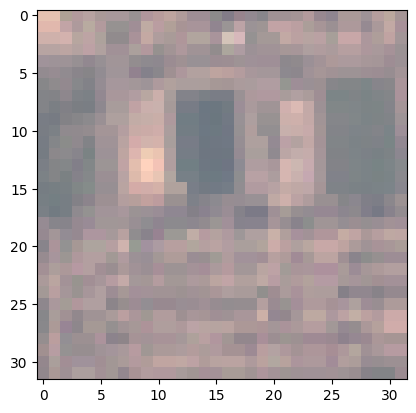

1
78


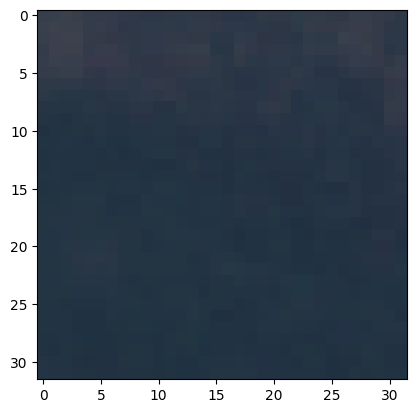

2
147


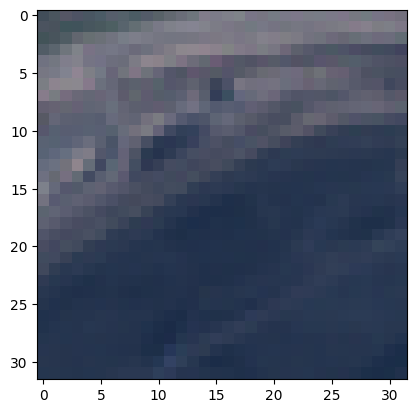

3
93


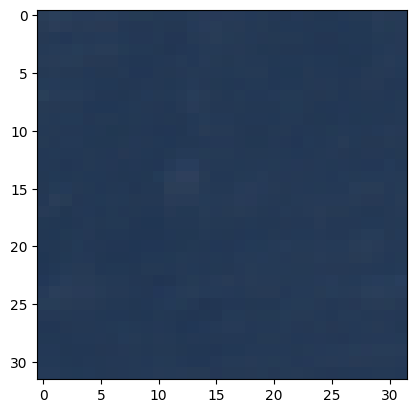

4
255


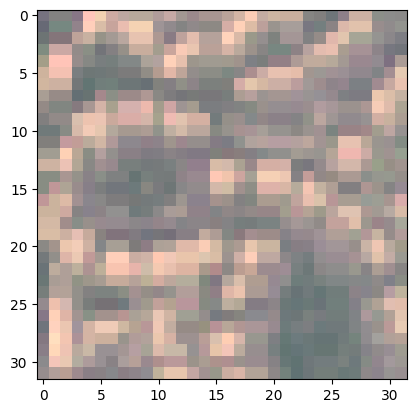

5
255


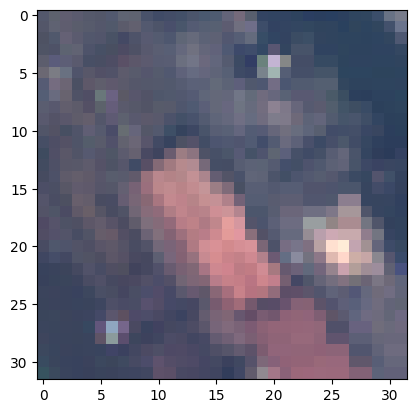

6
211


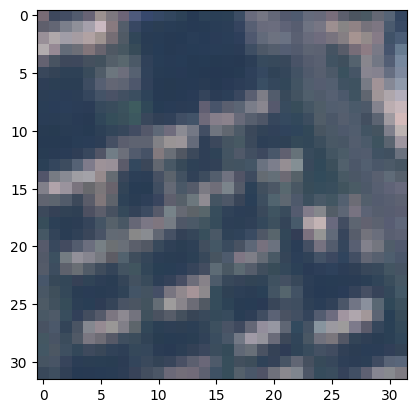

7
66


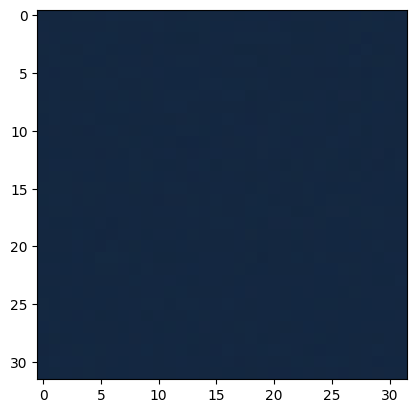

8
255


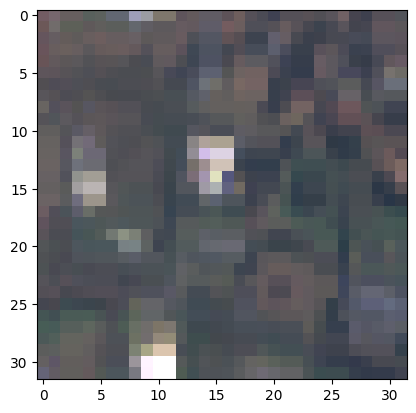

9
129


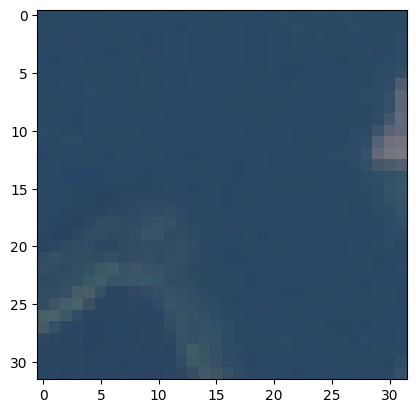

In [2]:
images = []
for i, example in enumerate(train_ds.take(10)):
    image, label = example["image"], example["label"]
    print(i)
    print(image.numpy().max())
    images.append(image)
    plt.imshow(image.numpy())
    plt.show()

In [3]:
list_train_ds = list(train_ds)

In [26]:
len(train_ds)

352366

In [5]:
#I will sample 50k images from list_train_ds
#train_ds_sampled = list_train_ds[:200000]

In [29]:
#extract labels and data as numpy arrays:
#def getCount(arr, label):
#    try:
#        unique, counts = np.unique(y, return_counts=True)
#        return np.asarray((unique, counts)).T[label][1]
#    except:
#        return 0

x_final = np.array([])
y_final = np.array([])
#and getCount(x, 0)<=5000
#y = np.concatenate([y for x, y in ds], axis=0)
for label in range(0, 17):

    x = np.array([element['image'] for element in list_train_ds if element['label']==label])
    y = np.array([element['label'] for element in list_train_ds if element['label']==label])
    
    x = x[:3000]
    y = y[:3000]
    
    try:
        x_final = np.concatenate((x_final, x), axis = 0)
        y_final = np.concatenate((y_final, y), axis = 0)
        
    except:
        x_final = x
        y_final = y
#x = np.concatenate([x for x, y in ds], axis=0)

In [20]:
unique, counts = np.unique(y_final, return_counts=True)

print(np.asarray((unique, counts)).T)

[[0.000e+00 3.000e+03]
 [1.000e+00 3.000e+03]
 [2.000e+00 3.000e+03]
 [3.000e+00 3.000e+03]
 [4.000e+00 3.000e+03]
 [5.000e+00 3.000e+03]
 [6.000e+00 3.000e+03]
 [7.000e+00 3.000e+03]
 [8.000e+00 3.000e+03]
 [9.000e+00 3.000e+03]
 [1.000e+01 3.000e+03]
 [1.100e+01 3.000e+03]
 [1.200e+01 3.000e+03]
 [1.300e+01 3.000e+03]
 [1.400e+01 2.392e+03]
 [1.500e+01 3.000e+03]
 [1.600e+01 3.000e+03]]


In [ ]:
np.asarray((unique, counts)).T[0]

In [18]:
y = np.array([element['label'] for element in list_train_ds])
unique, counts = np.unique(y, return_counts=True)

print(np.asarray((unique, counts)).T)

[[    0  5068]
 [    1 24431]
 [    2 31693]
 [    3  8651]
 [    4 16493]
 [    5 35290]
 [    6  3269]
 [    7 39326]
 [    8 13584]
 [    9 11954]
 [   10 42902]
 [   11  9514]
 [   12  9165]
 [   13 41377]
 [   14  2392]
 [   15  7898]
 [   16 49359]]


In [83]:
def save_data_hdf5(data, ds_name, file_address, mode="w"):
    """
    r: Readonly, file must exist
    r+: Read/write, file must exist
    w:Create file, truncate if exists
    w- or x:Create file, fail if exists
    a:Read/write if exists, create otherwise (default)
    """
    h5_file = h5py.File(file_address+".hdf5", mode)
    dset = h5_file.create_dataset(ds_name, shape=data.shape, dtype='float64')
    dset[:] = data
    h5_file.close()

In [84]:
x_final.shape

(50392, 32, 32, 3)

In [95]:
y_final = y_final.astype('uint8')

In [96]:
train_data=[]
for i in range(len(x_final)):
    train_data.append([x_final[i], y_final[i]])
    
print(len(train_data[0]))
d = np.array(train_data)
print(d.shape)
#save_data_hdf5(d, 'so2sat5', r'C:\My projects\AI project\LA-OOD\datasets\so2sat5' ,'w')


2
(50392, 2)


C:\Users\harrs\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [116]:
from torch.utils.data import DataLoader, TensorDataset
from torch import Tensor

# Create dataset from several tensors with matching first dimension
# Samples will be drawn from the first dimension (rows)
d_new = TensorDataset(Tensor(x_final), Tensor(y_final))

In [118]:
d.shape

(50392, 2)

In [119]:
d[0][0].shape

(32, 32, 3)

In [117]:
h5f = h5py.File(r'C:\My projects\AI project\LA-OOD\datasets\so2sat13.hdf5', 'w')
h5f.create_dataset('so2sat13', data=d_new)
h5f.close()

C:\Users\harrs\AppData\Local\Programs\Python\Python37\lib\site-packages\h5py\_hl\base.py:118: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  data = np.asarray(data, order="C", dtype=as_dtype)
C:\Users\harrs\AppData\Local\Programs\Python\Python37\lib\site-packages\h5py\_hl\base.py:118: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.asarray(data, order="C", dt

TypeError: Object dtype dtype('O') has no native HDF5 equivalent

In [44]:
!pip install h5py
import h5py


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [123]:
x_final.shape

(50392, 32, 32, 3)

In [164]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

model = VGG16(include_top=True, weights=None, classes=17, input_shape = (32, 32, 3))
images = preprocess_input(x_final)

In [166]:
from keras.optimizers import Adam
import keras
import tensorflow as tf
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

opt = Adam(learning_rate=lr_schedule)

#opt = Adam(lr=0.01)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [167]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [151]:
b = np.zeros((y_final.size, y_final.max() + 1))
b[np.arange(y_final.size), y_final] = 1 #onehotencode y

In [176]:
import gc
gc.collect()

3880

In [169]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_so2sat.h5", monitor='accuracy', verbose=1, save_best_only=True, mode='auto', period=1)
early = EarlyStopping(monitor='accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
#hist = model.fit(steps_per_epoch=100, x=images, y=b, epochs=100,callbacks=[checkpoint,early])


hist = model.fit(images, b, epochs = 100, callbacks=[checkpoint, early])

Epoch 1/100
1574/1575 [============================>.] - ETA: 0s - loss: 13078589.0000 - accuracy: 0.0608
Epoch 1: accuracy improved from -inf to 0.06078, saving model to vgg16_so2sat.h5
1575/1575 [==============================] - 27s 17ms/step - loss: 13072360.0000 - accuracy: 0.0608
Epoch 2/100
1575/1575 [==============================] - ETA: 0s - loss: 14.9677 - accuracy: 0.0595
Epoch 2: accuracy did not improve from 0.06078
1575/1575 [==============================] - 25s 16ms/step - loss: 14.9677 - accuracy: 0.0595
Epoch 3/100
1573/1575 [============================>.] - ETA: 0s - loss: 2.8336 - accuracy: 0.0597
Epoch 3: accuracy did not improve from 0.06078
1575/1575 [==============================] - 25s 16ms/step - loss: 2.8336 - accuracy: 0.0597
Epoch 4/100
1574/1575 [============================>.] - ETA: 0s - loss: 2.8336 - accuracy: 0.0584
Epoch 4: accuracy did not improve from 0.06078
1575/1575 [==============================] - 25s 16ms/step - loss: 2.8336 - accuracy: 0

KeyboardInterrupt: 

In [175]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
import numpy as np
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam
import tensorflow as tf

model = Sequential()
model.add(Conv2D(input_shape=(32,32,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=17, activation="softmax"))

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9)

opt = Adam(learning_rate=lr_schedule)

#opt = Adam(lr=0.01)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

checkpoint = ModelCheckpoint("vgg16_so2sat.h5", monitor='accuracy', verbose=1, save_best_only=True, mode='auto', period=1)
early = EarlyStopping(monitor='accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
#hist = model.fit(steps_per_epoch=100, x=images, y=b, epochs=100,callbacks=[checkpoint,early])


hist = model.fit(images, b, epochs = 100, callbacks=[checkpoint, early])

Epoch 1/100
1574/1575 [============================>.] - ETA: 0s - loss: 2.2310 - accuracy: 0.2295
Epoch 1: accuracy improved from -inf to 0.22948, saving model to vgg16_so2sat.h5
1575/1575 [==============================] - 26s 16ms/step - loss: 2.2308 - accuracy: 0.2295
Epoch 2/100
1575/1575 [==============================] - ETA: 0s - loss: 1.9521 - accuracy: 0.3075
Epoch 2: accuracy improved from 0.22948 to 0.30755, saving model to vgg16_so2sat.h5
1575/1575 [==============================] - 26s 16ms/step - loss: 1.9521 - accuracy: 0.3075
Epoch 3/100
1574/1575 [============================>.] - ETA: 0s - loss: 1.8668 - accuracy: 0.3376
Epoch 3: accuracy improved from 0.30755 to 0.33765, saving model to vgg16_so2sat.h5
1575/1575 [==============================] - 26s 16ms/step - loss: 1.8667 - accuracy: 0.3377
Epoch 4/100
1574/1575 [============================>.] - ETA: 0s - loss: 1.8488 - accuracy: 0.3460
Epoch 4: accuracy improved from 0.33765 to 0.34611, saving model to vgg16_so

1575/1575 [==============================] - 25s 16ms/step - loss: 0.6302 - accuracy: 0.7852
Epoch 32/100
1573/1575 [============================>.] - ETA: 0s - loss: 0.6464 - accuracy: 0.7764
Epoch 32: accuracy did not improve from 0.79223
1575/1575 [==============================] - 25s 16ms/step - loss: 0.6463 - accuracy: 0.7765
Epoch 33/100
1572/1575 [============================>.] - ETA: 0s - loss: 0.5216 - accuracy: 0.8233
Epoch 33: accuracy improved from 0.79223 to 0.82329, saving model to vgg16_so2sat.h5
1575/1575 [==============================] - 26s 17ms/step - loss: 0.5215 - accuracy: 0.8233
Epoch 34/100
1575/1575 [==============================] - ETA: 0s - loss: 0.4707 - accuracy: 0.8408
Epoch 34: accuracy improved from 0.82329 to 0.84085, saving model to vgg16_so2sat.h5
1575/1575 [==============================] - 26s 17ms/step - loss: 0.4707 - accuracy: 0.8408
Epoch 35/100
1572/1575 [============================>.] - ETA: 0s - loss: 0.5385 - accuracy: 0.8176
Epoch 35: 

1572/1575 [============================>.] - ETA: 0s - loss: 0.1372 - accuracy: 0.9570
Epoch 63: accuracy did not improve from 0.96138
1575/1575 [==============================] - 26s 16ms/step - loss: 0.1371 - accuracy: 0.9570
Epoch 64/100
1573/1575 [============================>.] - ETA: 0s - loss: 0.1474 - accuracy: 0.9535
Epoch 64: accuracy did not improve from 0.96138
1575/1575 [==============================] - 25s 16ms/step - loss: 0.1474 - accuracy: 0.9535
Epoch 65/100
1572/1575 [============================>.] - ETA: 0s - loss: 0.1090 - accuracy: 0.9643
Epoch 65: accuracy improved from 0.96138 to 0.96430, saving model to vgg16_so2sat.h5
1575/1575 [==============================] - 26s 16ms/step - loss: 0.1090 - accuracy: 0.9643
Epoch 66/100
1574/1575 [============================>.] - ETA: 0s - loss: 0.1832 - accuracy: 0.9449
Epoch 66: accuracy did not improve from 0.96430
1575/1575 [==============================] - 25s 16ms/step - loss: 0.1832 - accuracy: 0.9450
Epoch 67/100

KeyboardInterrupt: 

In [183]:
import numpy as np
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [201]:
x_final = torch.from_numpy(x_final)
y_final = torch.from_numpy(y_final)

In [208]:
class VGG16(nn.Module):
    def __init__(self, num_classes=17):
        super(VGG16, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer5 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer6 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer7 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer8 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer9 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer10 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer11 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer12 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer13 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(7*7*512, 4096),
            nn.ReLU())
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU())
        self.fc2= nn.Sequential(
            nn.Linear(4096, num_classes))
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.layer7(out)
        out = self.layer8(out)
        out = self.layer9(out)
        out = self.layer10(out)
        out = self.layer11(out)
        out = self.layer12(out)
        out = self.layer13(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [209]:
num_classes = 17
num_epochs = 100
batch_size = 128
learning_rate = 0.005

model = VGG16(num_classes).to(device)


# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)  


# Train the model
total_step = len(y_final)

In [210]:


for epoch in range(num_epochs):
    for i in range(len(y_final)):  
        # Move tensors to the configured device
        images = x_final.to(device)
        #labels = labels.to(device)
        #images=x_final[i]
        labels = y_final[i]
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            
'''
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in valid_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            del images, labels, outputs
    
        print('Accuracy of the network on the {} validation images: {} %'.format(5000, 100 * correct / total)) 
        '''

RuntimeError: Given groups=1, weight of size [32, 3, 3, 3], expected input[50392, 32, 32, 3] to have 3 channels, but got 32 channels instead

In [207]:
x_final.permute

<function Tensor.permute>